<a href="https://colab.research.google.com/github/basantiroomie/ML/blob/main/Open_CV_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.

In [ ]:
import cv2
img1=cv2.imread('img.jpg')

cv2.imshow('Image',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('out_img.jpg',img1)

gray_img=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
cv2.imshow('Image',gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

resized_img=cv2.resize(img1,(400,400))
cv2.imshow('Image',resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.rectangle(img1,(10,10),(50,50),(255,0,0),thickness=2)
cv2.imshow('Image',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.circle(img1,(0,0),100,(0,255,0),thickness=2)
cv2.imshow('Image',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.line(img1, (50, 50), (400, 400), (255, 0, 0), thickness=3)
cv2.imshow('Image', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

blurred_img = cv2.GaussianBlur(img1, (15, 15), 0)
cv2.imshow('Blurred Image', blurred_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

flipped_img = cv2.flip(img1, 1)
cv2.imshow('Flipped Image', flipped_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.ellipse(img1, (250, 250), (100, 150), 0, 0, 180, (255, 255, 0), thickness=2)
cv2.imshow('Image', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.circle(img1, (300, 300), 50, (255, 0, 0), thickness=-1)
cv2.imshow('Image with Filled Circle', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.rectangle(img1, (150, 150), (450, 450), (0, 255, 0), thickness=-1)
cv2.imshow('Image with Filled Rectangle', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

border_img = cv2.copyMakeBorder(img1, 50, 50, 50, 50, cv2.BORDER_CONSTANT, value=(255, 0, 0))
cv2.imshow('Image with Border', border_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

gray_img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
_, thresh_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('Thresholded Image', thresh_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

hsv_img = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
cv2.imshow('HSV Image', hsv_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.arrowedLine(img1, (100, 100), (400, 400), (0, 255, 255), thickness=3)
cv2.imshow('Image with Arrowed Line', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

import numpy as np
blank_img = np.zeros((500, 500, 3), dtype=np.uint8)
cv2.imshow('Blank Image', blank_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

2. Apply the watershed transform on a grayscale image to segment the objects. Display the original image and the segmented output, highlighting the boundaries of the segmented regions

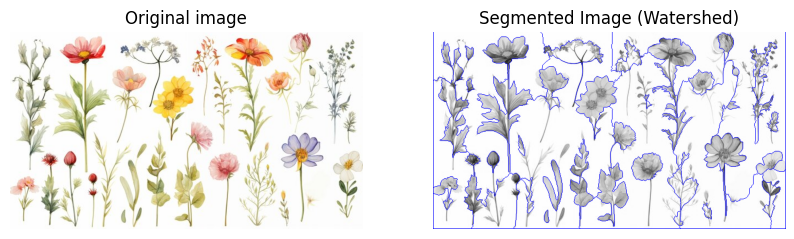

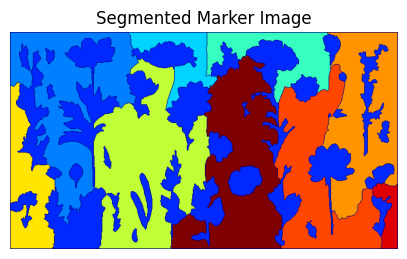

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('sample_image.jpg')
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray_bgr = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR)

_, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

sure_bg = cv2.dilate(opening,kernel,iterations=3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

_, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1

markers[unknown == 255] = 0

cv2.watershed(gray_bgr, markers)
gray_bgr[markers == -1] = [255,0,0]

cv2.imwrite('segmented_image.jpg', gray_bgr)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('Original image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(gray_bgr, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image (Watershed)')
plt.axis('off')

plt.show()

cv2.imwrite('segmented_marker_image.jpg', markers * 10)

plt.figure(figsize=(5,5))
plt.imshow(markers, cmap='jet')
plt.title('Segmented Marker Image')
plt.axis('off')
plt.show()

3. implement geometric transformations on an image, including translation, rotation, and scaling. Display the original image alongside the transformed images for comparison

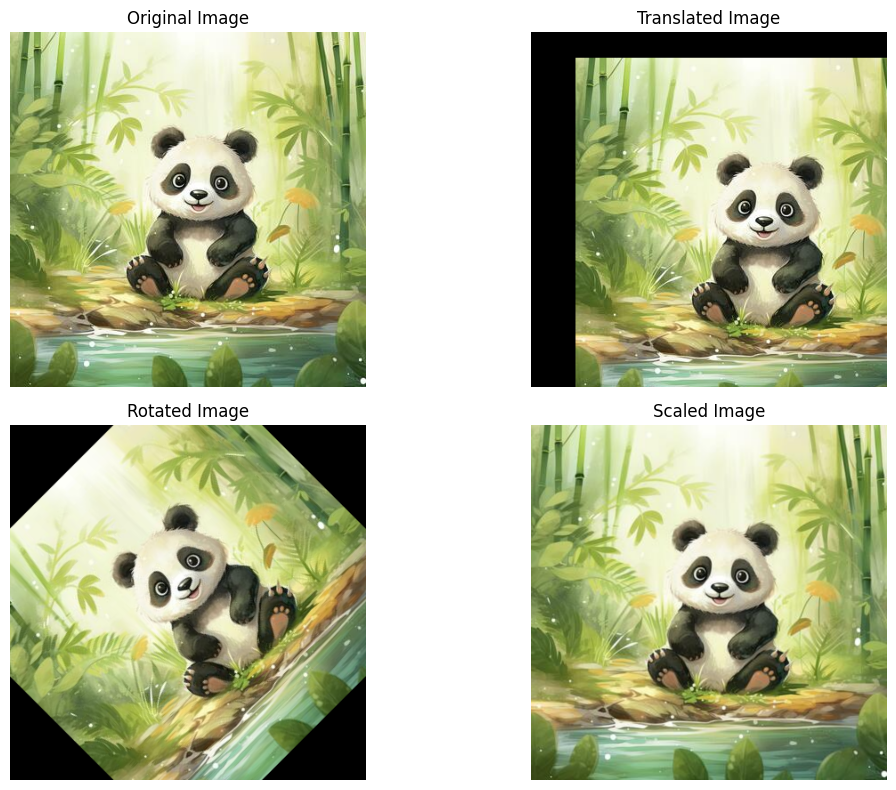

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width = img.shape[:2]

translation_matrix = np.float32([[1, 0, 50], [0, 1, 30]])
translated_img = cv2.warpAffine(img, translation_matrix, (width, height))

angle = 45
center = (width // 2, height // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_img = cv2.warpAffine(img, rotation_matrix, (width, height))

scale_x, scale_y = 1.5, 1.5
scaled_img = cv2.resize(img, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(translated_img)
plt.title('Translated Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(rotated_img)
plt.title('Rotated Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(scaled_img)
plt.title('Scaled Image')
plt.axis('off')

plt.tight_layout()
plt.show()


4. given a set of corresponding points between two images, compute the homography matrix. Use this matrix to warp one image onto another, and display the original and warped images

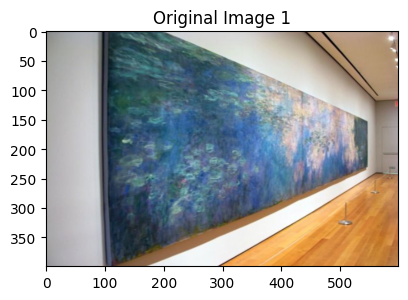

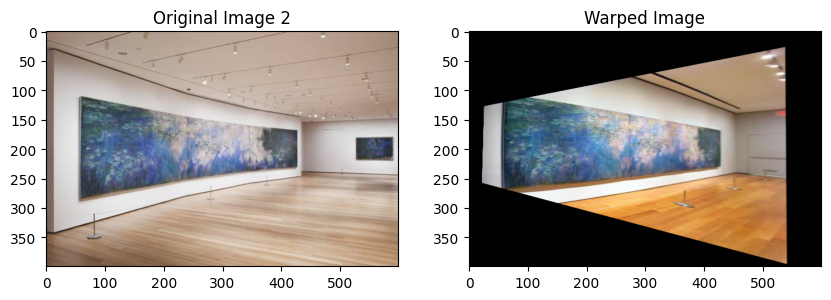

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('image1.jpg')
img2 = cv2.imread('image2.jpg')

img1 = cv2.resize(img1, (600, 400))
img2 = cv2.resize(img2, (600, 400))

src_pts = np.array([[107.0, 2.0], [545.0, 156.0], [545.0, 228.0], [114.0, 398.0]], dtype=np.float32)

dst_pts = np.array([[62.0, 121.0], [425.0, 171.0], [425.0, 228.0], [61.0, 268.0]], dtype=np.float32)
H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)

warped_img = cv2.warpPerspective(img1, H, (img2.shape[1], img2.shape[0]))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image 1")
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image 2")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Warped Image")
plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB))

plt.show()

5. using a calibration patter (eg, a checkerboard), perform camera calibration to obtain intrinsic and extrinsix paramaters. Display the calibration results and the reprojection error

Camera matrix:
 [[2.03450908e+05 0.00000000e+00 5.40063805e+02]
 [0.00000000e+00 2.03441518e+05 5.40534124e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion coefficients:
 [[-4.61353585e+01 -5.64457483e-04  3.56851404e-04 -6.54766739e-03
  -4.97567852e-09]]
Reprojection error: 1.0981681582876173


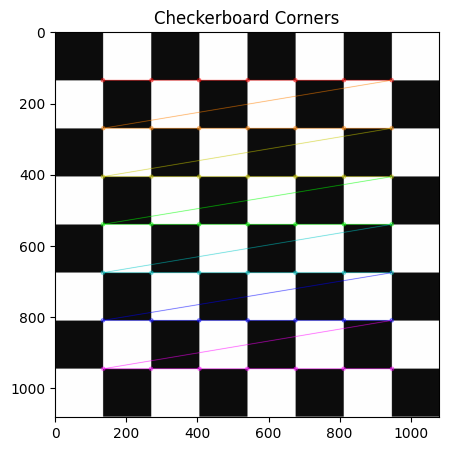

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('black_and_white_checkerboard.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

checkerboard = (7,7)

objp = np.zeros((checkerboard[0] * checkerboard[1], 3), np.float32)
objp[:,:2] = np.mgrid[0:checkerboard[0], 0:checkerboard[1]].T.reshape(-1, 2)

objpoints=[]
imgpoints=[]

ret, corners=cv2.findChessboardCorners(gray,checkerboard,None)

if ret:
    objpoints.append(objp)
    imgpoints.append(corners)

    img = cv2.drawChessboardCorners(img, checkerboard, corners, ret)

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

    mean_error = 0
    for i in range(len(objpoints)):
        imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
        error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)
        mean_error += error

    print("Camera matrix:\n", mtx)
    print("Distortion coefficients:\n", dist)
    print("Reprojection error:", mean_error / len(objpoints))

    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Checkerboard Corners')
    plt.show()

else:
    print("Checkerboard not found.")

6. Show the original image and the transformed image that appears as if viewed from a different angle

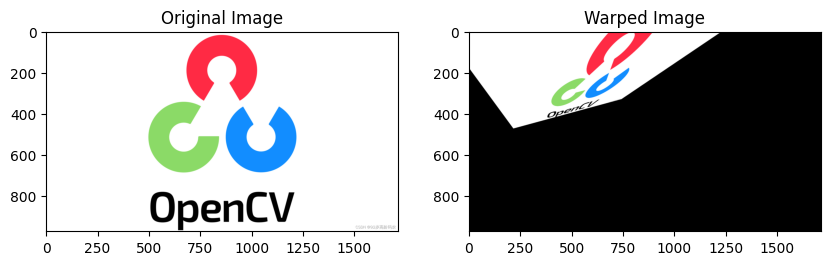

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('opencv-wallpaper.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

src_pts = np.array([[50,50], [200, 50], [50, 200], [200, 200]], dtype ='float32')
dst_pts = np.array([[10,100], [180, 60], [100, 250], [220, 220]], dtype ='float32')

H, _ = cv2.findHomography(src_pts, dst_pts)

height, width = img.shape[:2]
warped_img = cv2.warpPerspective(img, H, (width, height))

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title('Warped Image')
plt.imshow(warped_img)

7. given two corresponding sets of points from stereo images, compute the fundamental matrix. Explain its significance and visualize the epipolar lines on both images

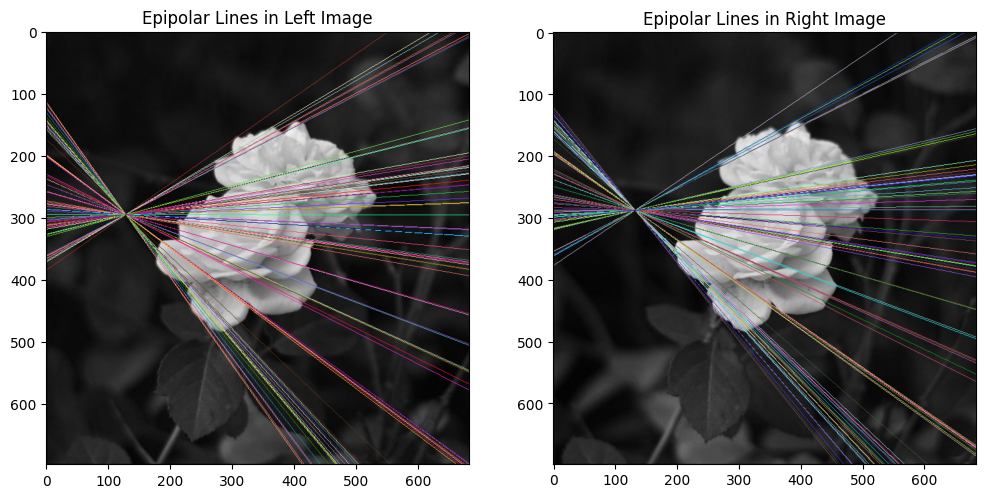

Fundamental Matrix (F):
 [[-4.60389542e-06 -1.65175511e-04  4.94728362e-02]
 [ 1.72054462e-04  1.40273942e-05 -2.61890488e-02]
 [-4.89173650e-02  1.77924179e-02  1.00000000e+00]]
Number of inliers: 88


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('left_img.png')
img2 = cv2.imread('right_img.png')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create(500)
kp1, des1 = orb.detectAndCompute(img1_gray, None)
kp2, des2 = orb.detectAndCompute(img2_gray, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

pts1 = np.array([kp1[m.queryIdx].pt for m in matches])
pts2 = np.array([kp2[m.trainIdx].pt for m in matches])

F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC)

pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]

def draw_epipolar_lines(img1, img2, lines, pts1, pts2):
    r, c = img1.shape[:2]
    img1_color = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
    img2_color = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

    for r, pt1, pt2 in zip(lines, pts1, pts2):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [c, -(r[2]+r[0]*c)/r[1]])
        img1_color = cv2.line(img1_color, (x0, y0), (x1, y1), color, 1)
        img2_color = cv2.circle(img2_color, tuple(map(int, pt2)), 5, color, -1)

    return img1_color, img2_color

lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2, F)
lines1 = lines1.reshape(-1, 3)
img1_lines, _ = draw_epipolar_lines(img1_gray, img2_gray, lines1, pts1, pts2)

lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F)
lines2 = lines2.reshape(-1, 3)
img2_lines, _ = draw_epipolar_lines(img2_gray, img1_gray, lines2, pts2, pts1)

plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(cv2.cvtColor(img1_lines, cv2.COLOR_BGR2RGB))
plt.title('Epipolar Lines in Left Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(img2_lines, cv2.COLOR_BGR2RGB))
plt.title('Epipolar Lines in Right Image')
plt.show()

print("Fundamental Matrix (F):\n", F)
print("Number of inliers:", len(pts1))

8.  apply edge detection (using canny or sobel) line detection (using hough transform), and corner detection (using Harris) on a sample image. Display the results of each operation sequentially

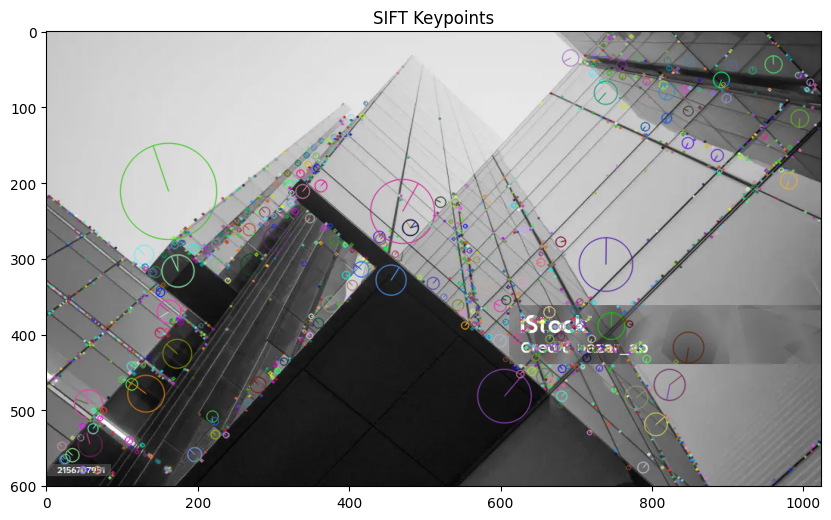

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import io

url = 'https://media.istockphoto.com/id/2156707951/photo/modern-office-architecture.webp?s=1024x1024&w=is&k=20&c=2xJDRN8xZ_qPC-w4I5nLlaLLwOmu9l77aMUuDsLN2CU='
response = requests.get(url, stream=True).raw
img = np.asarray(bytearray(response.read()), dtype="uint8")
img = cv2.imdecode(img, cv2.IMREAD_COLOR)

if img is None:
    print("Error: Could not load image. Please check the URL.")
else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(gray, 100, 200)

    sift = cv2.SIFT_create()

    kp, des = sift.detectAndCompute(gray, None)

    img_with_keypoints = cv2.drawKeypoints(gray, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    plt.figure(figsize=(10,6))
    plt.imshow(img_with_keypoints)
    plt.title('SIFT Keypoints')
    plt.show()

9. extract sift features from an image and visualize keypoints on the original image. Discuss how SIFT can be used for matching between different images

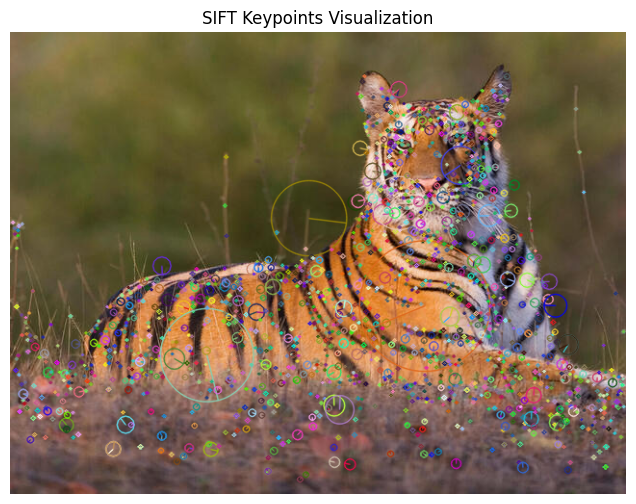

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('tiger.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
keypoints, descriptors =sift.detectAndCompute(gray,None)
image_with_keypoints=cv2.drawKeypoints(image,keypoints,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image_with_keypoints_rgb = cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,6))
plt.imshow(image_with_keypoints_rgb)
plt.axis('off')
plt.title('SIFT Keypoints Visualization')
plt.show()

compare the surf and hog feature descriptors by extracting features from the same image. Visualize and discuss the differences in keypoints and feature representation

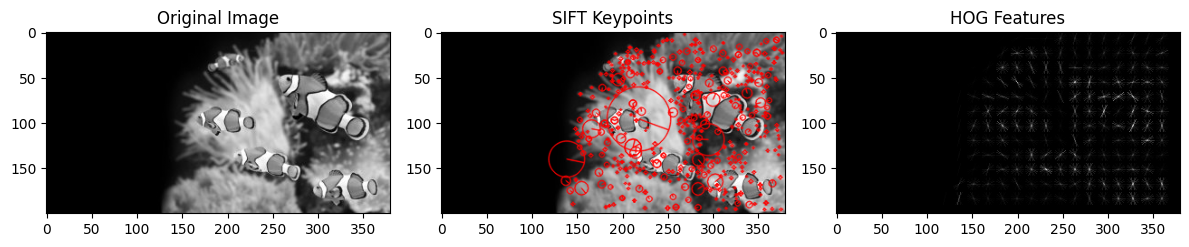

Number of SIFT keypoints: 504
HOG feature vector length: 8712


In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
import numpy as np
import requests
from io import BytesIO

image_url = "https://st3.depositphotos.com/1000434/12878/i/380/depositphotos_128782826-stock-photo-sea-anemone-and-clown-fish.jpg"

response = requests.get(image_url)
response.raise_for_status()

img = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()
keypoints_sift, descriptors_sift = sift.detectAndCompute(img, None)
img_sift = cv2.drawKeypoints(img, keypoints_sift, None, (255, 0, 0), 4)

hog_features, hog_image = hog(
img,
visualize = True,
block_norm = "L2-Hys",
pixels_per_cell = (16,16),
cells_per_block = (2,2),
feature_vector = True,
)

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")

plt.subplot(1,3,2)
plt.title("SIFT Keypoints")
plt.imshow(img_sift)

plt.subplot(1,3,3)
plt.title("HOG Features")
plt.imshow(hog_image, cmap="gray")

plt.tight_layout()
plt.show()

print(f"Number of SIFT keypoints: {len(keypoints_sift)}")
print(f"HOG feature vector length: {len(hog_features)}")

implement a region counting algorithm to count the number of distinct regions in a segmented image. display the original image with the regions labeled by  their count

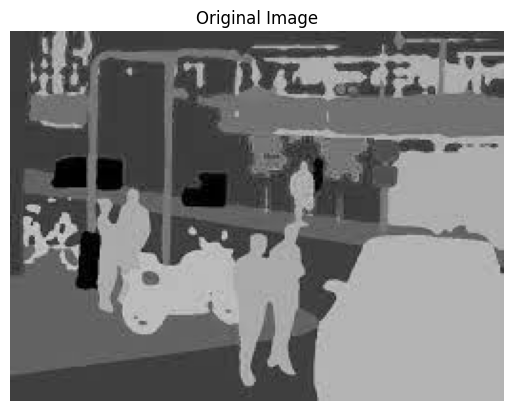

Number of distinct regions: 125


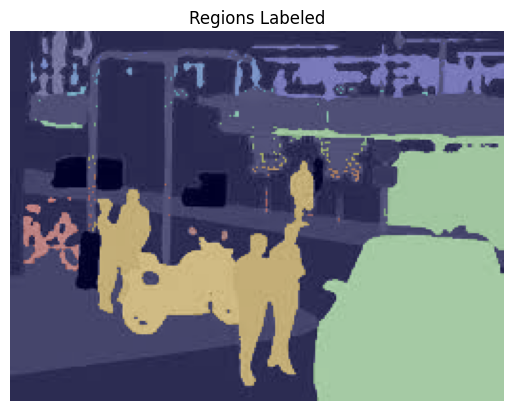

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to count regions in a binary image
def count_regions(image):
    # Ensure the image is binary (0 or 255)
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Find connected components
    num_labels, labels = cv2.connectedComponents(binary_image)

    return num_labels - 1, labels  # Subtract 1 to exclude the background label

# Function to display the regions labeled with their count
def display_labeled_regions(image, labels):
    # Convert the label matrix to a color image (we scale it to fit the 0-255 range)
    labeled_image = cv2.applyColorMap(np.uint8(labels * 255 / np.max(labels)), cv2.COLORMAP_JET)

    # Convert the original grayscale image to a 3-channel image (for blending)
    image_colored = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Superimpose the label image on the original image
    output_image = cv2.addWeighted(image_colored, 0.7, labeled_image, 0.3, 0)

    # Display the image with regions labeled
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title("Regions Labeled")
    plt.axis("off")
    plt.show()

# Read the input image (in grayscale)
image_path = "image.jpeg"  # Change this to your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()


# Count the regions
num_regions, labels = count_regions(image)

# Display the result
print(f"Number of distinct regions: {num_regions}")
display_labeled_regions(image, labels)

# 23/05/25

convert an image from rgb to different color spaces (eg hsv, lab, ycbcr). display the original image and each converted image side by side, explaining the significance of each color space.

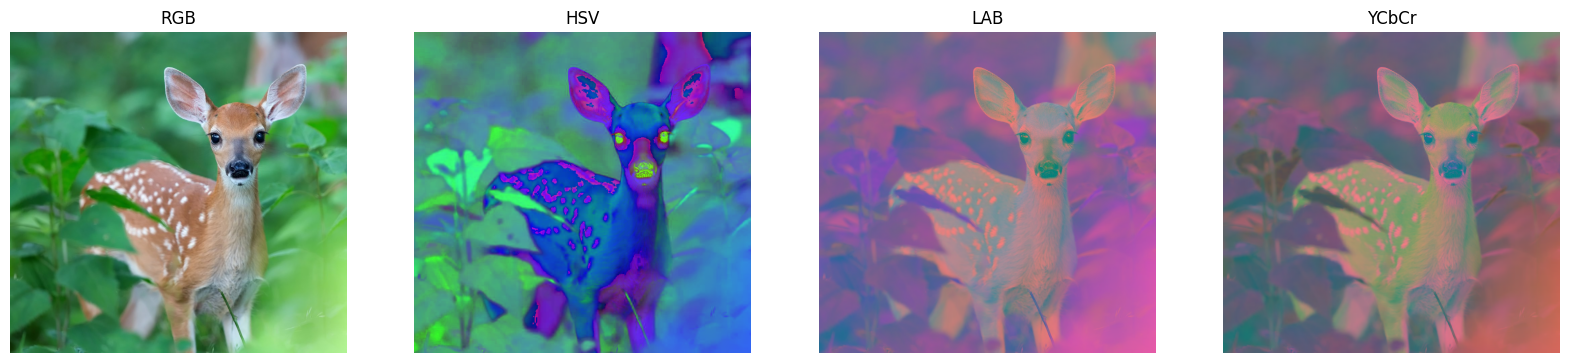

In [ ]:
import cv2
import matplotlib.pyplot as plt

img_bgr = cv2.imread('image.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)

img_ycbcr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(img_rgb)
axes[0].set_title('RGB')
axes[0].axis('off')

axes[1].imshow(img_hsv)
axes[1].set_title('HSV')
axes[1].axis('off')

axes[2].imshow(img_lab)
axes[2].set_title('LAB')
axes[2].axis('off')

axes[3].imshow(img_ycbcr)
axes[3].set_title('YCbCr')
axes[3].axis('off')

plt.show()


apply a gaussian filter to an image to reduce noise. Display the original and filtered images side by side for comparison

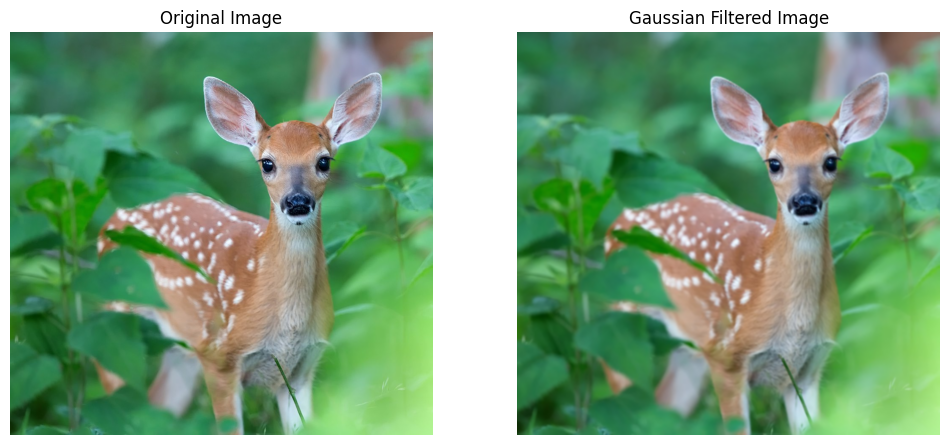

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('image.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

filtered_image = cv2.GaussianBlur(image_rgb, (7, 7), 1.5)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Gaussian Filtered Image')
plt.imshow(filtered_image)
plt.axis('off')

plt.show()